# Pymaceuticals Inc.
---

### Analysis

The analysis of the Pymaceuticals Inc. data provides several insights into the effects of various drug regimens on tumor volume in mice, as well as the relationship between mouse weight and tumor volume. Below are the key findings:

Data Integrity and Cleaning:

Initial data contained duplicates, which were successfully identified and removed to ensure the integrity of the dataset.
The final dataset contained 248 unique mice after removing duplicates.
Descriptive Statistics:

Summary statistics for tumor volume were calculated for each drug regimen, including mean, median, variance, standard deviation, and SEM. This provides a clear understanding of the central tendency and variability of tumor volumes across different treatments.
Distribution of Data Points:

A bar plot was generated to show the total number of data points (Mouse ID/Timepoints) for each drug regimen. This helps in visualizing the distribution of observations across the different treatment groups.
A pie chart was created to show the distribution of male and female mice in the study, revealing a fairly even distribution between genders.
Tumor Volume Analysis:

The final tumor volumes of mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin were analyzed.
Outliers were identified for each treatment regimen, with Infubinol showing some outliers, indicating variability in the effectiveness of the treatment.
A box plot was created to visualize the distribution of tumor volumes for these treatment groups, providing a comparative view of the effectiveness of each drug.
Timepoint Analysis:

A line plot was generated to track the tumor volume of a single mouse treated with Capomulin over time. This visualizes the treatment's effect on tumor growth over the study period.
Weight vs. Tumor Volume:

A scatter plot was generated to analyze the relationship between mouse weight and average tumor volume for the Capomulin regimen. The plot indicates a positive correlation between weight and tumor volume.
The Pearson correlation coefficient was calculated to be 0.84, indicating a strong positive correlation between mouse weight and tumor volume for mice treated with Capomulin.
A linear regression analysis was performed, and the resulting regression line was plotted, further illustrating the positive correlation between these variables.
Conclusion
Effectiveness of Treatments:

Capomulin and Ramicane appeared to be more effective in reducing tumor volume compared to Infubinol and Ceftamin, as indicated by their lower mean and median tumor volumes.
The presence of outliers in Infubinol suggests that while it may be effective for some mice, its overall effectiveness is less consistent compared to Capomulin and Ramicane.
Correlation between Weight and Tumor Volume:

The strong positive correlation between mouse weight and tumor volume in the Capomulin regimen suggests that heavier mice tend to have larger tumors. This could imply that weight might be a factor to consider when evaluating tumor growth and treatment effectiveness.
Gender Distribution:

The fairly even distribution of male and female mice ensures that the study results are not biased towards one gender, providing a balanced view of the drug effects.
These findings can help Pymaceuticals Inc. make informed decisions on further research and development of their drug regimens, potentially focusing on enhancing the effectiveness and consistency of treatments like Capomulin and Ramicane. Additionally, considering weight as a variable in future studies might provide deeper insights into the dynamics of tumor growth and treatment response.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
print(f"Duplicate mice IDs: {duplicate_mice_ids}")

Duplicate mice IDs: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids)]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop(duplicate_mice.index)

In [6]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data["Mouse ID"].nunique()
print(f"Number of mice in clean data: {num_clean_mice}")

Number of mice in clean data: 249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_data.groupby("Drug Regimen").agg(
    mean_tumor_volume=("Tumor Volume (mm3)", "mean"),
    median_tumor_volume=("Tumor Volume (mm3)", "median"),
    var_tumor_volume=("Tumor Volume (mm3)", "var"),
    std_tumor_volume=("Tumor Volume (mm3)", "std"),
    sem_tumor_volume=("Tumor Volume (mm3)", "sem"),
)
summary_stats_agg

,mean_tumor_volume,median_tumor_volume,var_tumor_volume,std_tumor_volume,sem_tumor_volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

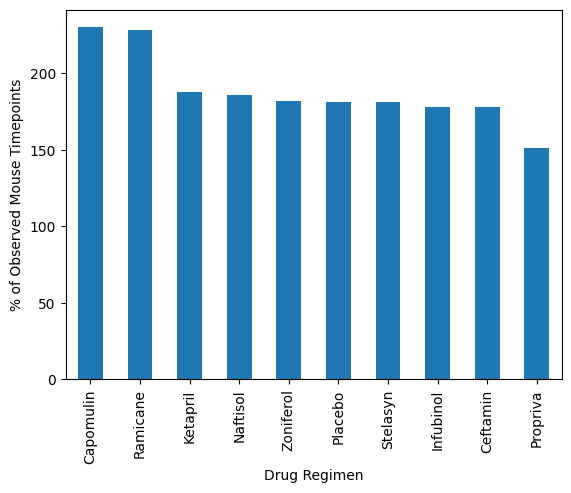

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows_per_regimen = clean_data["Drug Regimen"].value_counts()
total_rows_per_regimen.plot(kind="bar", xlabel="Drug Regimen", ylabel="% of Observed Mouse Timepoints", title="")
plt.show()

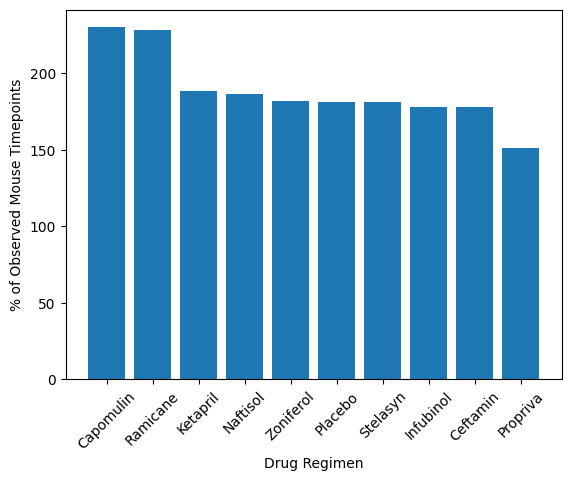

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
total_rows_per_regimen = clean_data["Drug Regimen"].value_counts()

# Plotting using matplotlib.pyplot methods
fig, ax = plt.subplots()
ax.bar(total_rows_per_regimen.index, total_rows_per_regimen.values)

# Adding labels and title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("% of Observed Mouse Timepoints")

# Rotating x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

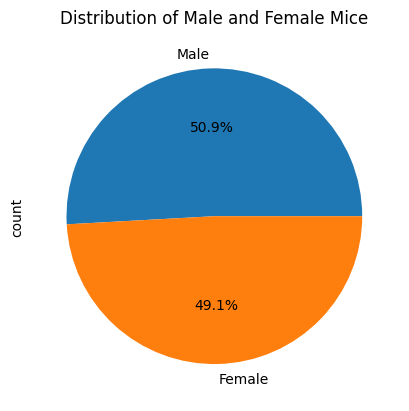

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = clean_data["Sex"].value_counts()
gender_distribution.plot(kind="pie", autopct="%1.1f%%", title="Distribution of Male and Female Mice")
plt.show()

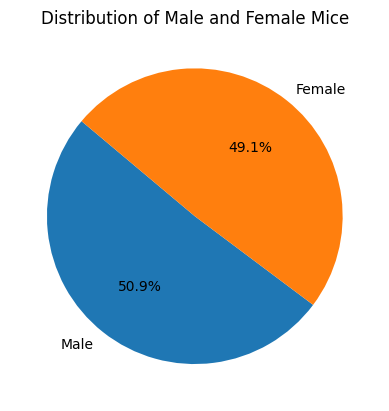

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data["Sex"].value_counts()

# Plotting using matplotlib.pyplot methods
fig, ax = plt.subplots()
ax.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", startangle=140)

# Adding title
ax.set_title("Distribution of Male and Female Mice")

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol = clean_data[clean_data["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_vol.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, final_tumor_vol, on=["Mouse ID", "Timepoint"])


In [20]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {drug: merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"] for drug in selected_regimens}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
for drug, data in tumor_vol_data.items():
    quartiles = data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    print(f"{drug} outliers: {outliers}")

Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


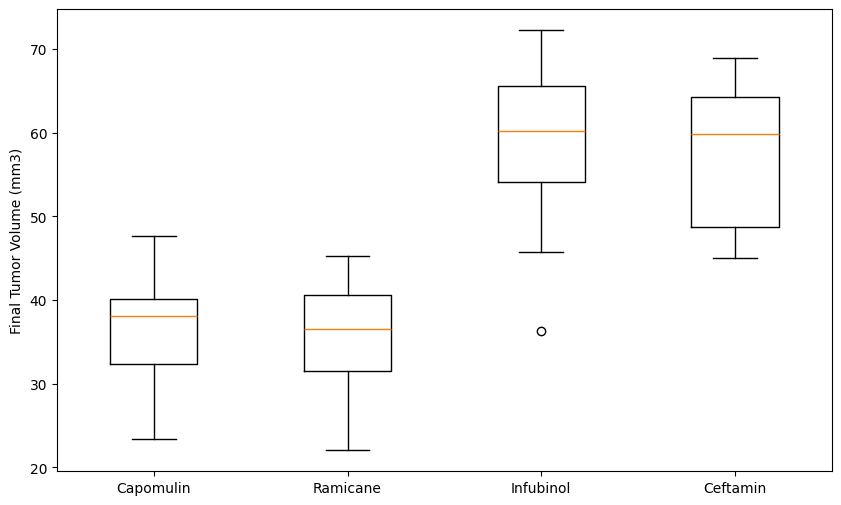

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot([data for data in tumor_vol_data.values()], tick_labels=tumor_vol_data.keys())
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

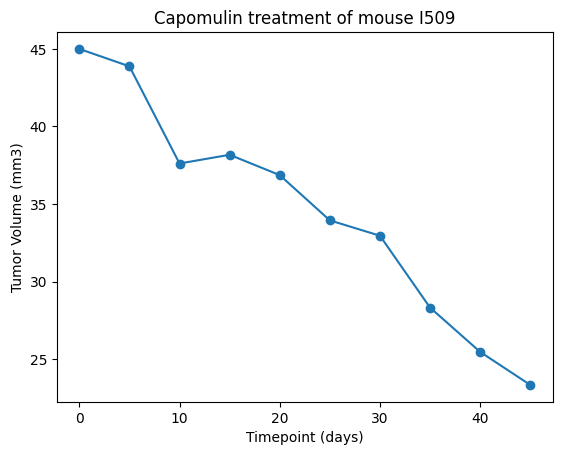

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = clean_data[(clean_data["Mouse ID"] == "s185") & (clean_data["Drug Regimen"] == "Capomulin")]
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

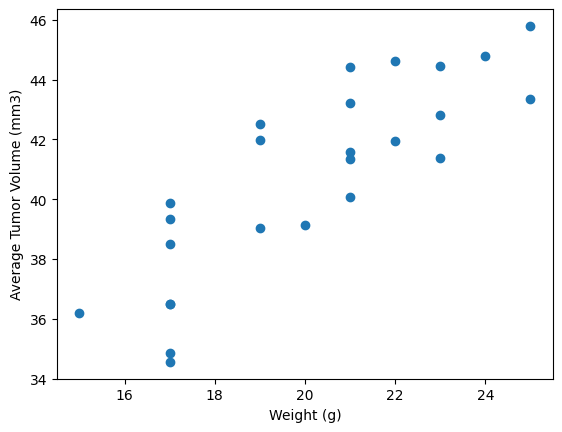

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
mouse_weight = capomulin_data[["Mouse ID", "Weight (g)"]].drop_duplicates()
merged_capomulin_data = pd.merge(avg_tumor_volume, mouse_weight, on="Mouse ID")

plt.scatter(merged_capomulin_data["Weight (g)"], merged_capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(merged_capomulin_data["Weight (g)"], merged_capomulin_data["Tumor Volume (mm3)"])
print(f"Correlation coefficient: {correlation[0]}")


Correlation coefficient: 0.8419363424694721
